### House Price Prediction in Python



In [3]:
!pip install seaborn
!pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("C:\\Users\\pauri\\OneDrive\\Escritorio\\Python projects\\House Price Prediction in Python\\housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Separamos los datos del DataFrame inicial para poder facilitarle al modelo datos que no haya visto nunca en la parte de entrenamiento del modelo

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(["median_house_value"],axis=1)
Y = df["median_house_value"]

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [12]:
train_df = X_train.join(Y_train)

In [13]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7949,-118.14,33.87,44.0,1607.0,271.0,799.0,283.0,5.0840,<1H OCEAN,214100.0
25,-122.28,37.85,41.0,535.0,123.0,317.0,119.0,2.4038,NEAR BAY,107500.0
14639,-117.19,32.79,35.0,1788.0,378.0,777.0,374.0,3.3713,NEAR OCEAN,238400.0
3478,-118.51,34.28,29.0,4239.0,653.0,1890.0,631.0,6.3911,<1H OCEAN,301700.0
5125,-118.27,33.98,30.0,1966.0,584.0,2028.0,535.0,1.6250,<1H OCEAN,101500.0
...,...,...,...,...,...,...,...,...,...,...
10528,-117.71,33.54,15.0,2460.0,368.0,962.0,320.0,7.3878,<1H OCEAN,318300.0
1134,-121.63,39.75,37.0,1296.0,296.0,569.0,257.0,1.8616,INLAND,70500.0
13477,-117.39,34.07,15.0,1966.0,331.0,1118.0,323.0,3.8558,INLAND,122700.0
403,-122.26,37.90,52.0,1927.0,279.0,705.0,288.0,7.8864,NEAR BAY,357300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

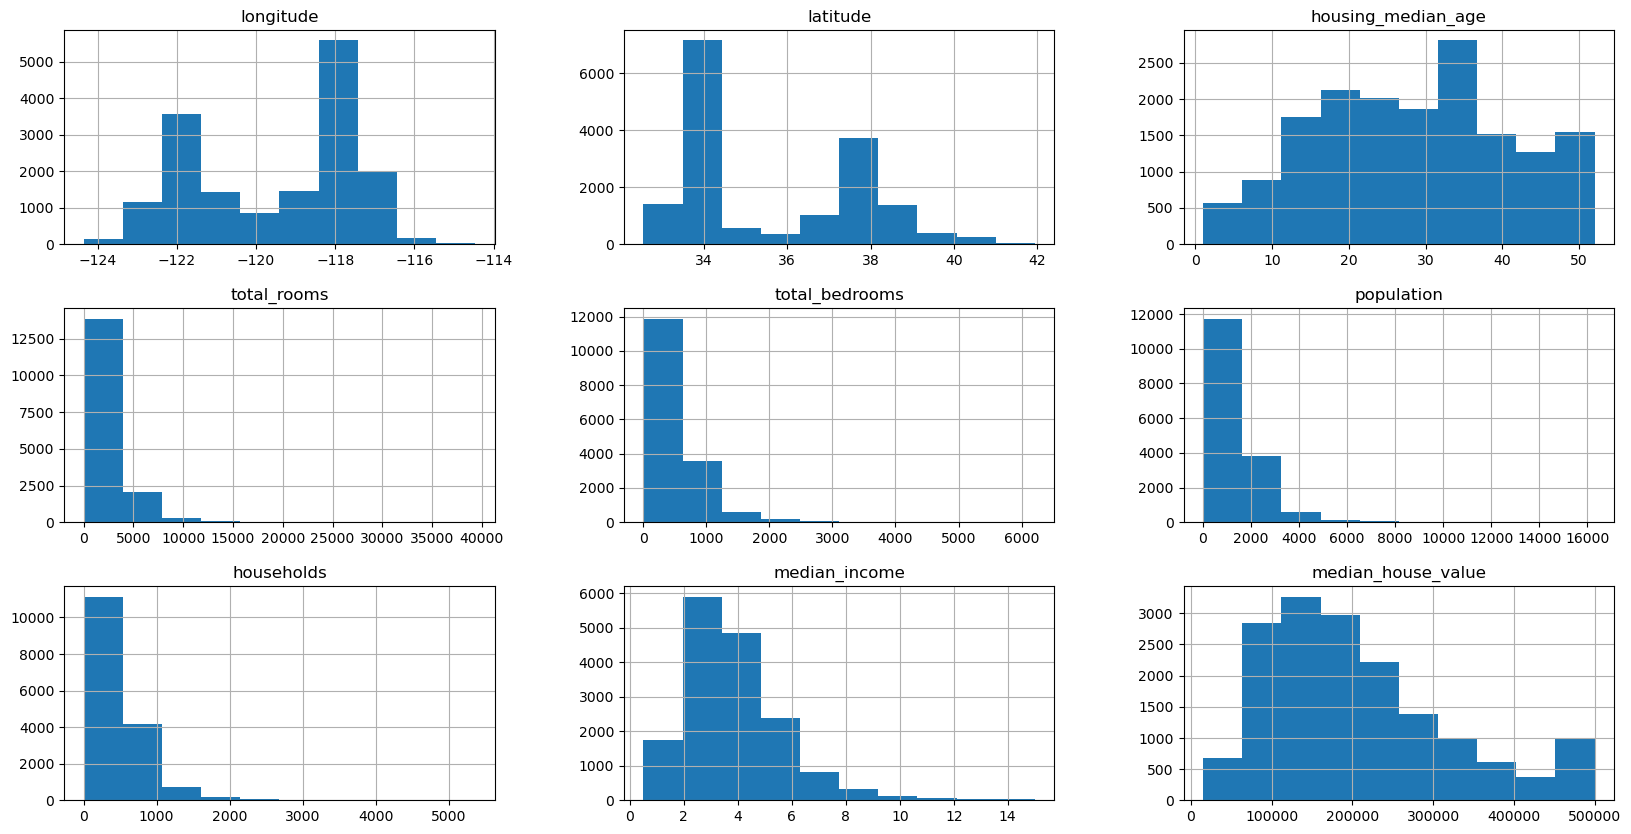

In [14]:
train_df.hist(figsize=(20,10))

<Axes: >

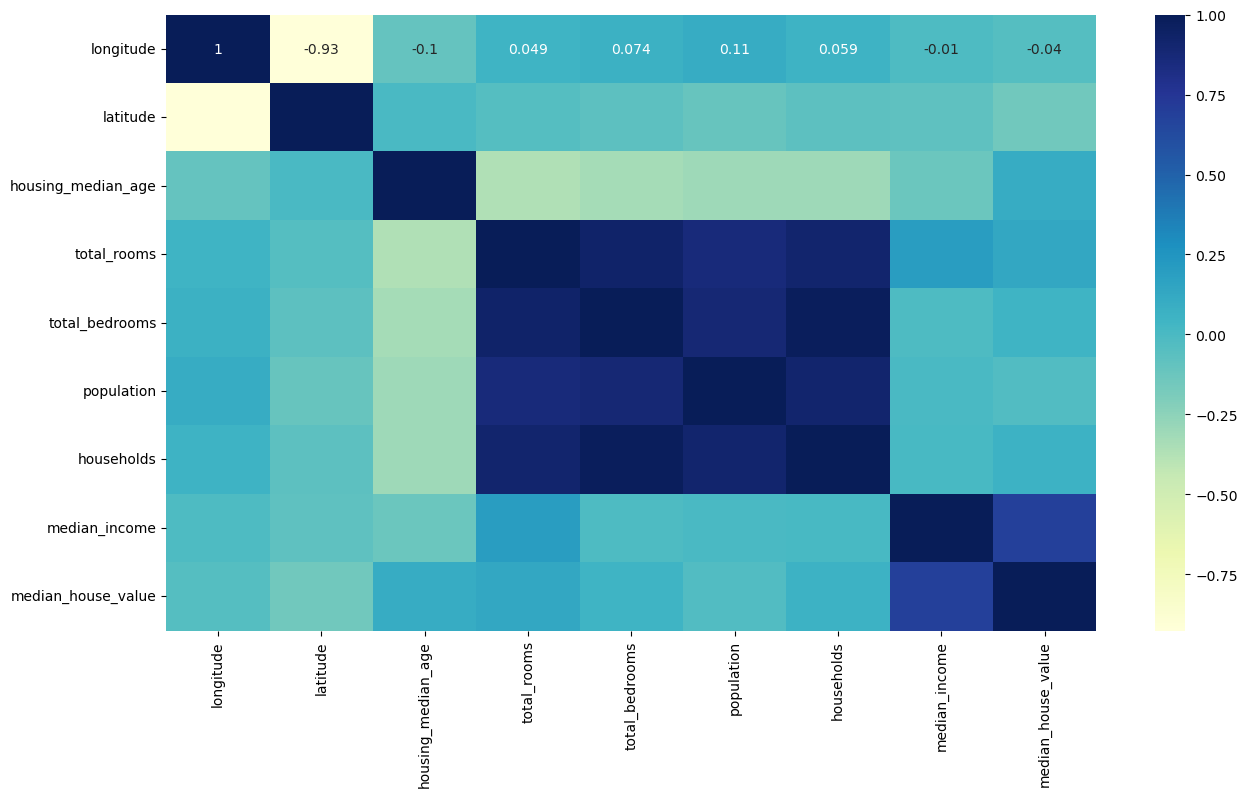

In [15]:
numeric_df = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]

plt.figure(figsize=(15,8))
sns.heatmap(train_df[numeric_df].corr(),annot=True,cmap="YlGnBu")

Vamos a tomar el logaritmo para normalizar y eliminar los valores extremos de las variables con colas de distribución sesgadas

In [17]:
train_df["total_rooms"]= np.log(train_df["total_rooms"]+1)
train_df["total_bedrooms"]= np.log(train_df["total_rooms"]+1)
train_df["population"]= np.log(train_df["total_rooms"]+1)
train_df["households"]= np.log(train_df["total_rooms"]+1)

In [18]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7949,-118.14,33.87,44.0,7.382746,2.126176,2.126176,2.126176,5.0840,<1H OCEAN,214100.0
25,-122.28,37.85,41.0,6.284134,1.985699,1.985699,1.985699,2.4038,NEAR BAY,107500.0
14639,-117.19,32.79,35.0,7.489412,2.138820,2.138820,2.138820,3.3713,NEAR OCEAN,238400.0
3478,-118.51,34.28,29.0,8.352319,2.235624,2.235624,2.235624,6.3911,<1H OCEAN,301700.0
5125,-118.27,33.98,30.0,7.584265,2.149931,2.149931,2.149931,1.6250,<1H OCEAN,101500.0
...,...,...,...,...,...,...,...,...,...,...
10528,-117.71,33.54,15.0,7.808323,2.175697,2.175697,2.175697,7.3878,<1H OCEAN,318300.0
1134,-121.63,39.75,37.0,7.167809,2.100201,2.100201,2.100201,1.8616,INLAND,70500.0
13477,-117.39,34.07,15.0,7.584265,2.149931,2.149931,2.149931,3.8558,INLAND,122700.0
403,-122.26,37.90,52.0,7.564238,2.147595,2.147595,2.147595,7.8864,NEAR BAY,357300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

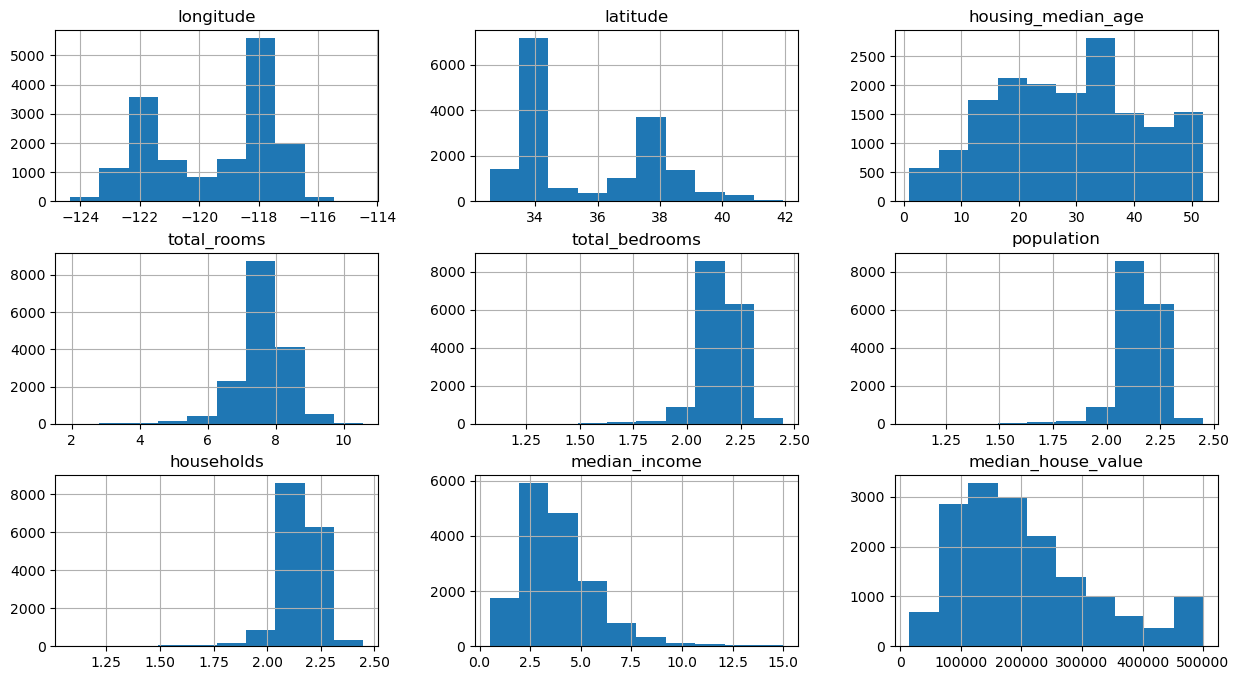

In [19]:
train_df.hist(figsize=(15,8))

Vamos a pasar los datos de ocen proximity a numéricos para poder analizarlos

In [21]:
train_df=train_df.join(pd.get_dummies(train_df.ocean_proximity).astype(int)).drop(["ocean_proximity"],axis=1)

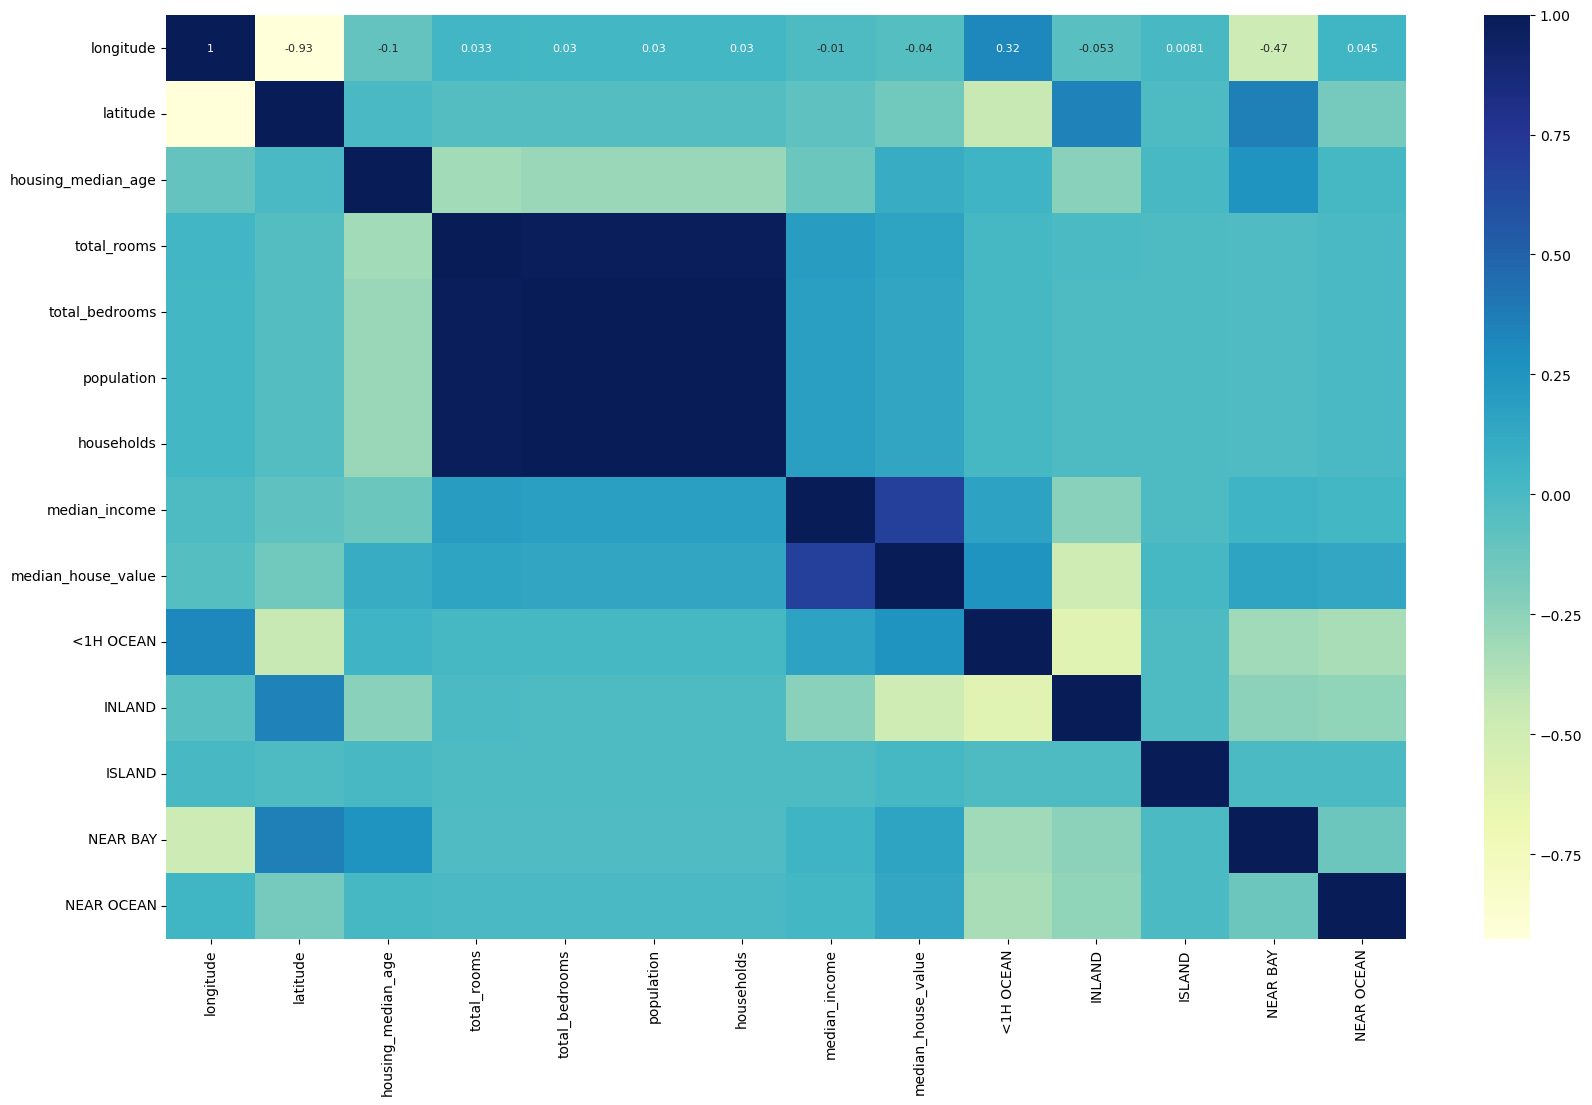

In [22]:
plt.figure(figsize=(20,12))
sns.heatmap(train_df.corr(),annot=True,annot_kws={"size":8},cmap="YlGnBu")
plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

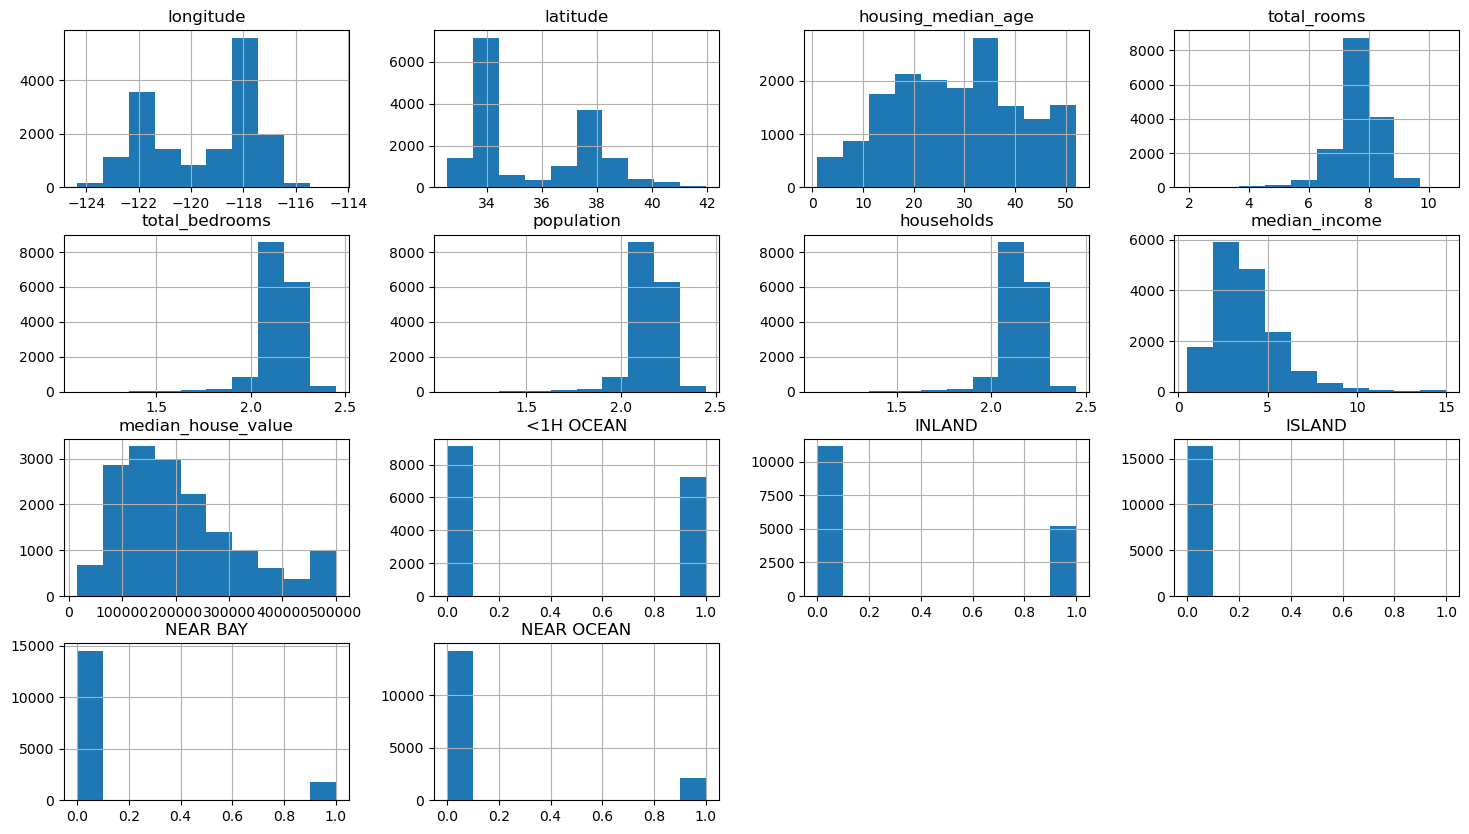

In [23]:
train_df.hist(figsize=(18,10))

<Axes: xlabel='latitude', ylabel='longitude'>

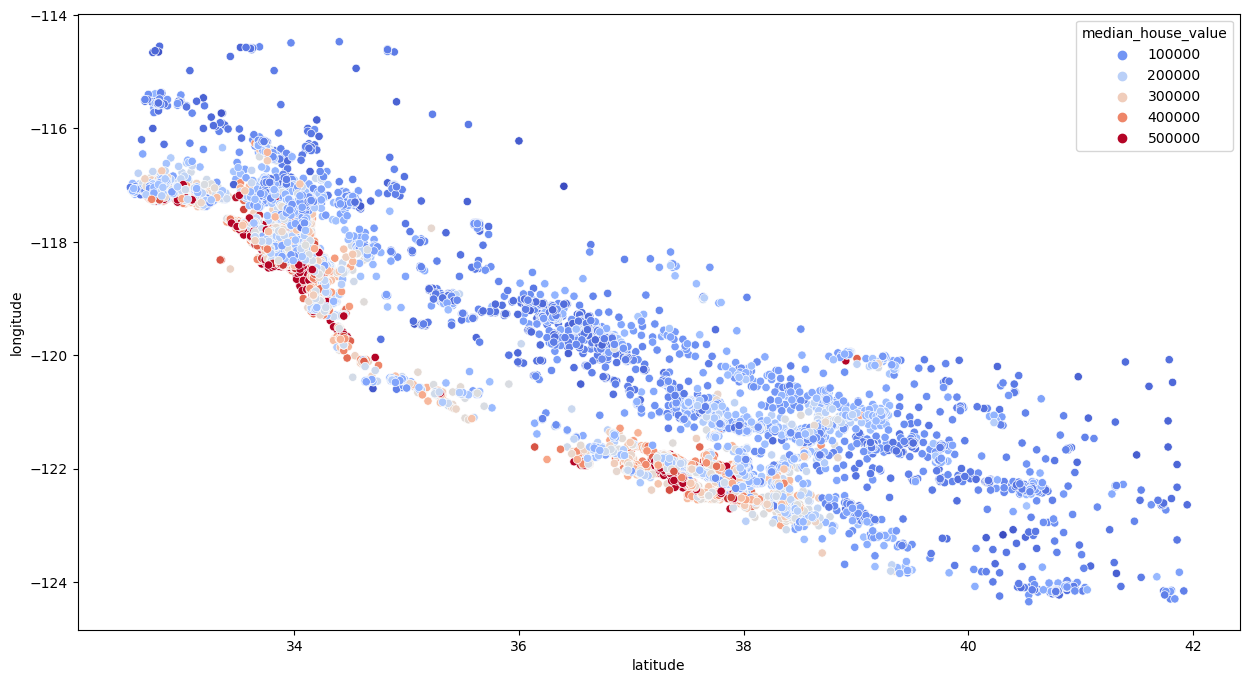

In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_df,hue="median_house_value",palette="coolwarm")

In [25]:
train_df["bedroom_ratio"] = train_df["total_bedrooms"]/ train_df["total_rooms"]
train_df["household_rooms"] =train_df["total_rooms"]/train_df["households"]

<Axes: >

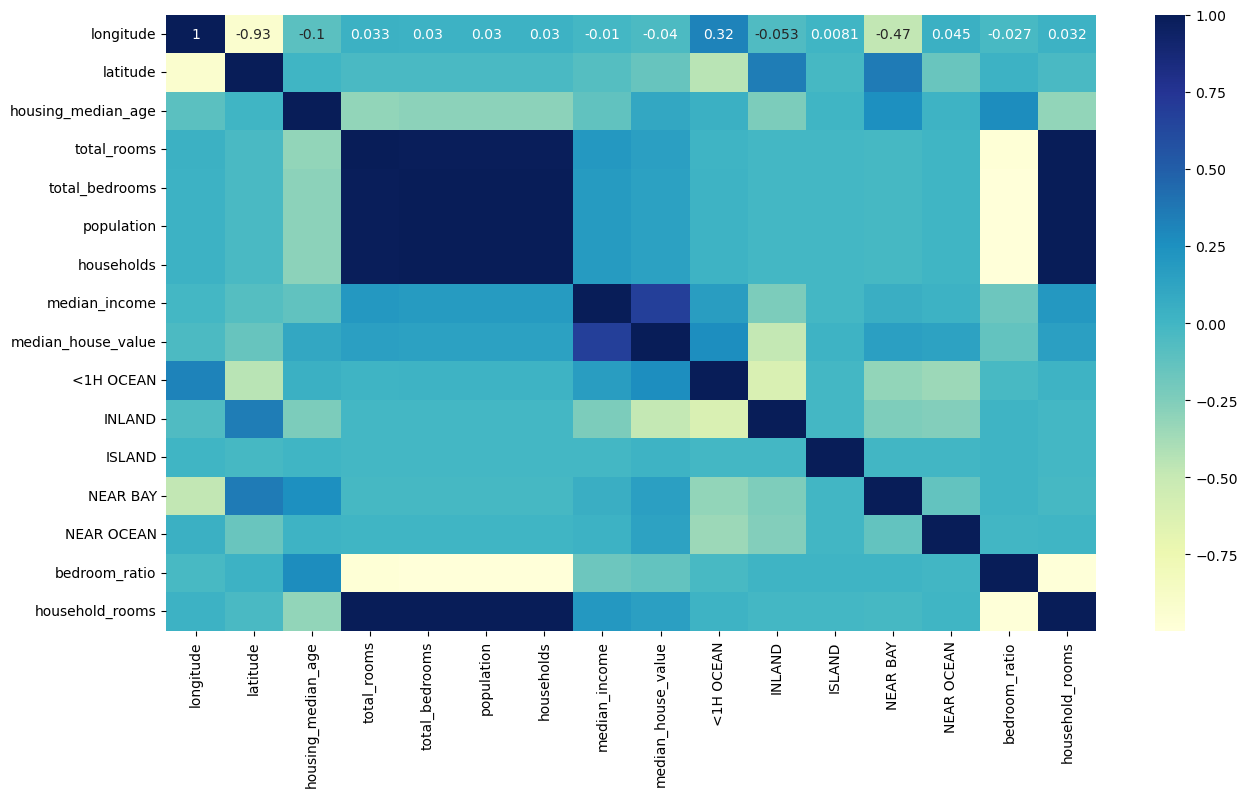

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(),annot=True,cmap="YlGnBu")

In [27]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
7949,-118.14,33.87,44.0,7.382746,2.126176,2.126176,2.126176,5.0840,214100.0,1,0,0,0,0,0.287992,3.472313
25,-122.28,37.85,41.0,6.284134,1.985699,1.985699,1.985699,2.4038,107500.0,0,0,0,1,0,0.315986,3.164697
14639,-117.19,32.79,35.0,7.489412,2.138820,2.138820,2.138820,3.3713,238400.0,0,0,0,0,1,0.285579,3.501657
3478,-118.51,34.28,29.0,8.352319,2.235624,2.235624,2.235624,6.3911,301700.0,1,0,0,0,0,0.267665,3.736012
5125,-118.27,33.98,30.0,7.584265,2.149931,2.149931,2.149931,1.6250,101500.0,1,0,0,0,0,0.283473,3.527678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10528,-117.71,33.54,15.0,7.808323,2.175697,2.175697,2.175697,7.3878,318300.0,1,0,0,0,0,0.278638,3.588883
1134,-121.63,39.75,37.0,7.167809,2.100201,2.100201,2.100201,1.8616,70500.0,0,1,0,0,0,0.293005,3.412916
13477,-117.39,34.07,15.0,7.584265,2.149931,2.149931,2.149931,3.8558,122700.0,0,1,0,0,0,0.283473,3.527678
403,-122.26,37.90,52.0,7.564238,2.147595,2.147595,2.147595,7.8864,357300.0,0,0,0,1,0,0.283914,3.522190


### Simple Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

X_train, Y_train = train_df.drop(["median_house_value"],axis=1), train_df["median_house_value"]

reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [30]:
test_df = X_test.join(Y_test)

test_df["total_rooms"]= np.log(test_df["total_rooms"]+1)
test_df["total_bedrooms"]= np.log(test_df["total_rooms"]+1)
test_df["population"]= np.log(test_df["total_rooms"]+1)
test_df["households"]= np.log(test_df["total_rooms"]+1)

test_df=test_df.join(pd.get_dummies(test_df.ocean_proximity).astype(int)).drop(["ocean_proximity"],axis=1)

test_df["bedroom_ratio"] = test_df["total_bedrooms"]/ test_df["total_rooms"]
test_df["household_rooms"] =test_df["total_rooms"]/test_df["households"]

In [31]:
X_test, Y_test = test_df.drop(["median_house_value"],axis=1), test_df["median_house_value"]

In [32]:
reg.score(X_test,Y_test)

0.6076725213076544

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,Y_train)

RandomForestRegressor()

In [35]:
forest.score(X_test,Y_test)

0.817593310559037

In [ ]:
forest.predict(X_test)